In [1]:
from pydantic import BaseModel
from gdsfactory.typings import Layer


class LayerMap(BaseModel):
    # waveguide layers
    WG: Layer = (1, 0)
    SLAB150: Layer = (2, 0)
    
    # utility layers
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    SHOW_PORTS: Layer = (1, 12)
    
    # label layers
    LABEL: Layer = (201, 0)
    LABEL_INSTANCES: Layer = (206, 0)
    TE: Layer = (203, 0)
    TM: Layer = (204, 0)
    TEXT: Layer = (66, 0)
    
    # electrical layers
    M1: Layer = (41, 0)
    VIA: Layer = (43, 0)
    
    class Config:
        frozen = True
        extra = "forbid"


LAYER = LayerMap()

2025-11-28 11:18:24.056 | INFO     | gdsfactory.config:__init__:205 - LogLevel: INFO
2025-11-28 11:18:25.169 | WARNING  | gdsfactory.config:showwarning:58 - 
The latest versions of gdsfactory work with Python 3.10 and above.
If you are using Python 3.9 or below, please install gdsfactory==6.116.0
However we recommend you to upgrade to Python 3.10 or above so you can use the latest gdsfactory features.



C:\Users\Lavan\AppData\Local\Temp\ipykernel_2100\4050817396.py:2: UserWarning: 
The latest versions of gdsfactory work with Python 3.10 and above.
If you are using Python 3.9 or below, please install gdsfactory==6.116.0
However we recommend you to upgrade to Python 3.10 or above so you can use the latest gdsfactory features.

  from gdsfactory.typings import Layer


In [2]:
from gdsfactory.config import PATH

In [3]:
PATH.klayout_lyp

WindowsPath('c:/Users/Lavan/anaconda3/lib/site-packages/gdsfactory/generic_tech/klayout/tech/generic_tech.lyp')

LAYER DESIGN SUMMARY
DevRec               [  68,0] #004080         HIDDEN
LABEL_INSTANCES      [ 206,0] blue            VISIBLE
LABEL_OPTICAL_IO     [ 201,0] blue            VISIBLE
LABEL_SETTINGS       [ 202,0] magenta         HIDDEN
M1                   [  41,0] #01ff6b         VISIBLE
PinRec               [  1,10] #404040         VISIBLE
SHOW_PORTS           [  1,12] #ff80a8         VISIBLE
SLAB150              [   2,0] cyan            VISIBLE
TE                   [ 203,0] blue            VISIBLE
TM                   [ 204,0] red             VISIBLE
Text                 [  66,0] blue            VISIBLE
VIA                  [  40,0] #cc4c00         VISIBLE
WG_PIN               [  1,10] #ff80a8         VISIBLE
Waveguide            [   1,0] #ff9d9d         VISIBLE
XS_BOX               [ 300,0] #f3ff80         VISIBLE
XS_M1                [ 304,0] green           VISIBLE
XS_OVERLAY           [ 311,0] blue            VISIBLE
XS_OXIDE_M1          [ 305,0] #f3ff80         VISIBLE
XS_OX_SI 

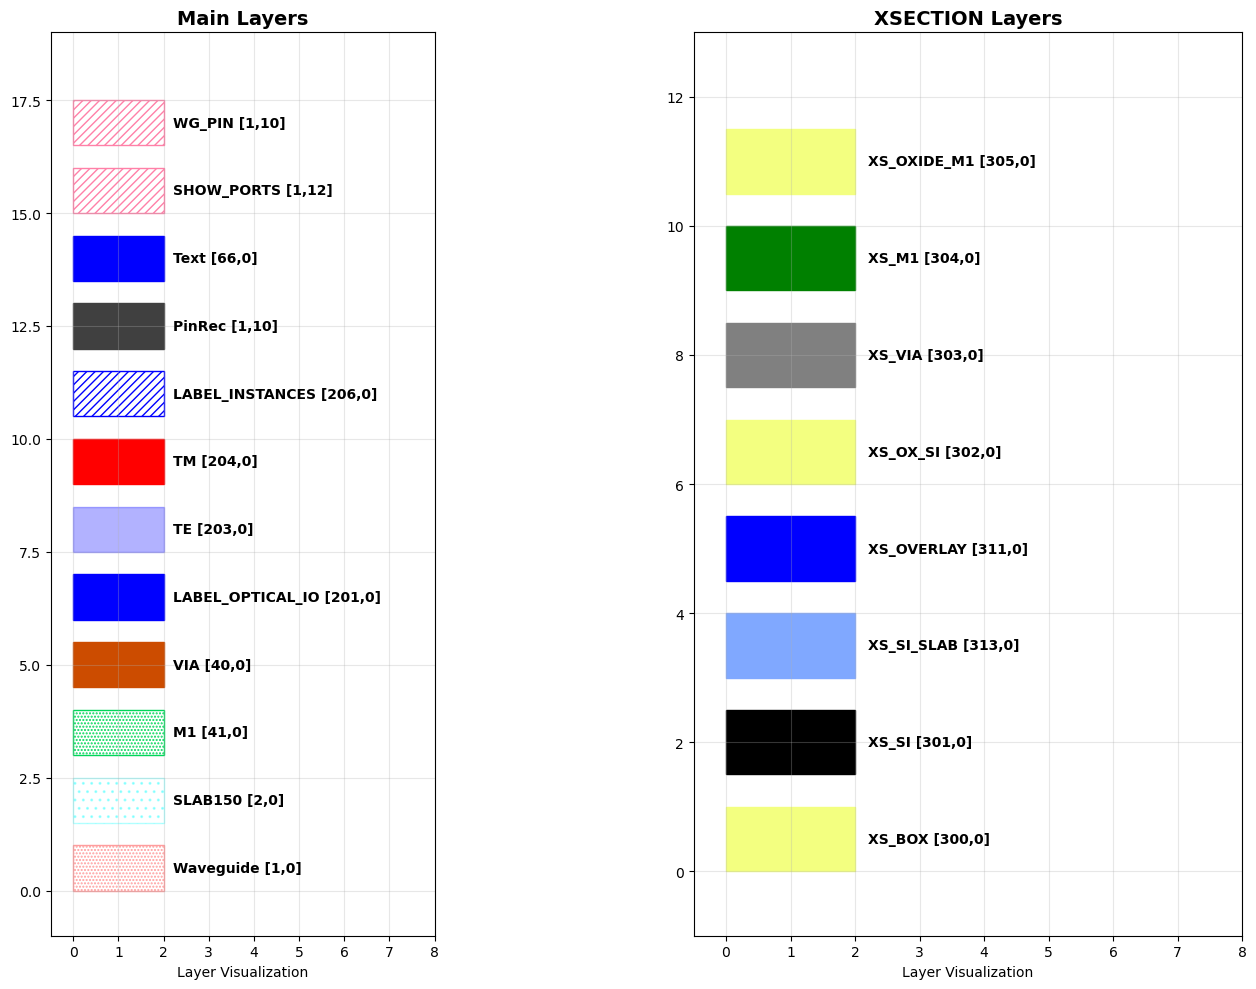

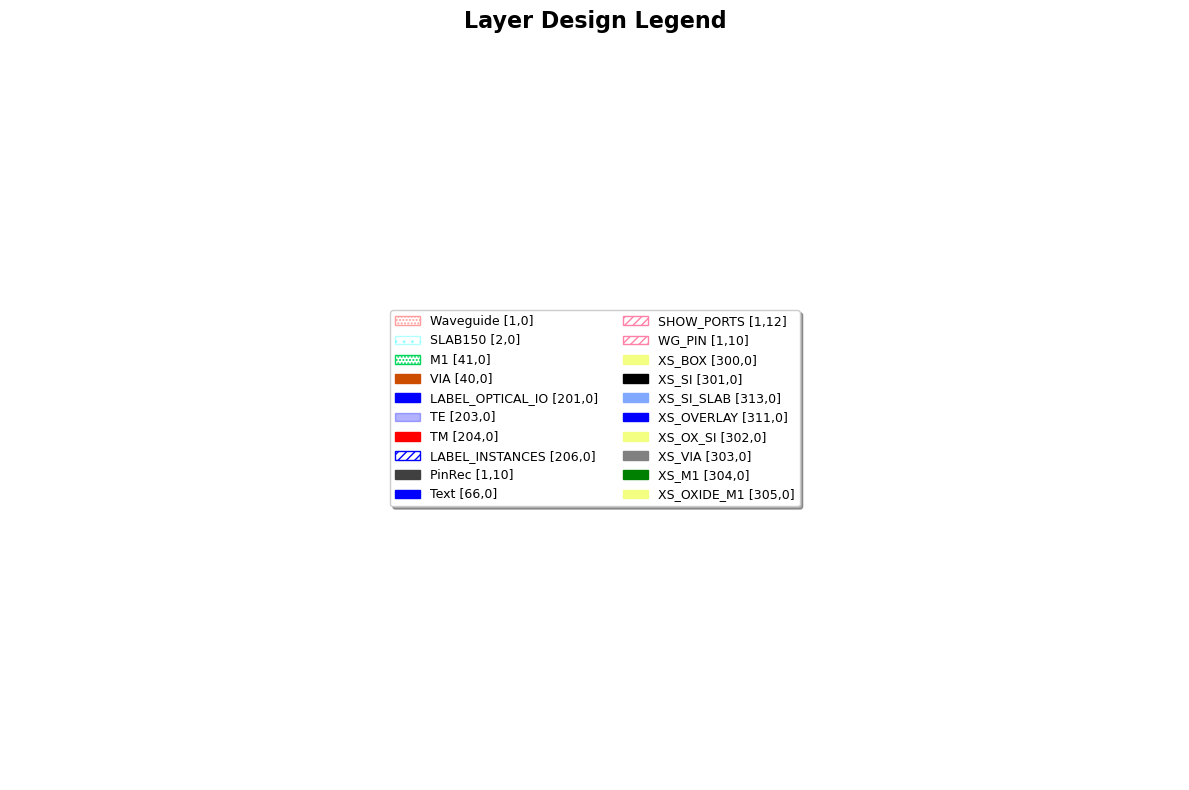

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, Patch
import matplotlib.patheffects as path_effects
import numpy as np

class LayerVisualizer:
    def __init__(self):
        self.layer_views = {
            'Waveguide': {
                'layer': [1, 0],
                'hatch_pattern': '.....',
                'width': 1,
                'color': '#ff9d9d',
                'visible': True
            },
            'SLAB150': {
                'layer': [2, 0],
                'layer_in_name': True,
                'hatch_pattern': '..',
                'transparent': True,
                'width': 1,
                'color': 'cyan',
                'visible': True
            },
            'M1': {
                'layer': [41, 0],
                'layer_in_name': True,
                'hatch_pattern': '.....',
                'width': 1,
                'color': '#01ff6b',
                'brightness': -16,
                'visible': True
            },
            'VIA': {
                'layer': [40, 0],
                'layer_in_name': True,
                'hatch_pattern': '',  # hollow
                'width': 1,
                'color': '#cc4c00',
                'visible': True
            },
            'LABEL_OPTICAL_IO': {
                'layer': [201, 0],
                'layer_in_name': True,
                'hatch_pattern': '',  # hollow
                'width': 1,
                'color': 'blue',
                'visible': True
            },
            'LABEL_SETTINGS': {
                'layer': [202, 0],
                'layer_in_name': True,
                'hatch_pattern': '',  # hollow
                'visible': False,
                'width': 1,
                'color': 'magenta'
            },
            'TE': {
                'layer': [203, 0],
                'layer_in_name': True,
                'transparent': True,
                'width': 1,
                'color': 'blue',
                'visible': True
            },
            'TM': {
                'layer': [204, 0],
                'layer_in_name': True,
                'width': 1,
                'color': 'red',
                'visible': True
            },
            'LABEL_INSTANCES': {
                'layer': [206, 0],
                'layer_in_name': True,
                'hatch_pattern': '////',
                'color': 'blue',
                'visible': True
            },
            'DevRec': {
                'layer': [68, 0],
                'hatch_pattern': '',  # hollow
                'visible': False,
                'transparent': True,
                'width': 1,
                'color': '#004080'
            },
            'PinRec': {
                'layer': [1, 10],
                'hatch_pattern': '',  # hollow
                'color': '#404040',
                'visible': True
            },
            'Text': {
                'layer': [66, 0],
                'hatch_pattern': '',  # hollow
                'width': 1,
                'color': 'blue',
                'visible': True
            },
            'SHOW_PORTS': {
                'layer': [1, 12],
                'layer_in_name': True,
                'hatch_pattern': '////',
                'color': '#ff80a8',
                'visible': True
            },
            'WG_PIN': {
                'layer': [1, 10],
                'layer_in_name': True,
                'hatch_pattern': '////',
                'color': '#ff80a8',
                'visible': True
            }
        }
        
        # XSECTION group members
        self.xsection_layers = {
            'XS_BOX': {
                'layer': [300, 0],
                'layer_in_name': True,
                'width': 1,
                'color': '#f3ff80',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_SI': {
                'layer': [301, 0],
                'layer_in_name': True,
                'width': 1,
                'color': 'black',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_SI_SLAB': {
                'layer': [313, 0],
                'layer_in_name': True,
                'width': 1,
                'color': '#80a8ff',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_OVERLAY': {
                'layer': [311, 0],
                'layer_in_name': True,
                'width': 1,
                'color': 'blue',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_OX_SI': {
                'layer': [302, 0],
                'layer_in_name': True,
                'width': 1,
                'color': '#f3ff80',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_VIA': {
                'layer': [303, 0],
                'layer_in_name': True,
                'width': 1,
                'color': 'grey',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_M1': {
                'layer': [304, 0],
                'layer_in_name': True,
                'width': 1,
                'color': 'green',
                'hatch_pattern': 'solid',
                'visible': True
            },
            'XS_OXIDE_M1': {
                'layer': [305, 0],
                'layer_in_name': True,
                'width': 1,
                'color': '#f3ff80',
                'hatch_pattern': 'solid',
                'visible': True
            }
        }

    def apply_brightness(self, color, brightness):
        """Apply brightness adjustment to color"""
        if isinstance(color, str) and color.startswith('#'):
            # Convert hex to RGB
            r = int(color[1:3], 16) / 255.0
            g = int(color[3:5], 16) / 255.0
            b = int(color[5:7], 16) / 255.0
            
            # Adjust brightness
            factor = 1 + brightness / 100.0
            r = max(0, min(1, r * factor))
            g = max(0, min(1, g * factor))
            b = max(0, min(1, b * factor))
            
            return (r, g, b)
        return color

    def create_layer_patch(self, layer_name, layer_info, x, y, width=2, height=1):
        """Create a matplotlib patch for a layer"""
        if not layer_info.get('visible', True):
            return None
            
        color = layer_info['color']
        
        # Apply brightness if specified
        if 'brightness' in layer_info:
            color = self.apply_brightness(color, layer_info['brightness'])
        
        # Handle transparency
        alpha = 0.3 if layer_info.get('transparent', False) else 1.0
        
        # Handle hatch patterns
        hatch = layer_info.get('hatch_pattern', '')
        if hatch == 'solid':
            hatch = ''
        
        # Create rectangle patch
        rect = Rectangle((x, y), width, height, 
                        facecolor=color if hatch == '' else 'none',
                        edgecolor=color,
                        linewidth=layer_info.get('width', 1),
                        hatch=hatch,
                        alpha=alpha,
                        label=layer_name)
        
        return rect

    def visualize_layers(self):
        """Create visualization of all layers"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
        
        # Main layers
        self._plot_layers(ax1, self.layer_views, "Main Layers")
        
        # XSECTION layers
        self._plot_layers(ax2, self.xsection_layers, "XSECTION Layers")
        
        plt.tight_layout()
        plt.show()

    def _plot_layers(self, ax, layers_dict, title):
        """Plot layers on given axis"""
        y_pos = 0
        y_step = 1.5
        
        for layer_name, layer_info in layers_dict.items():
            if not layer_info.get('visible', True):
                continue
                
            patch = self.create_layer_patch(layer_name, layer_info, 0, y_pos)
            if patch:
                ax.add_patch(patch)
                
                # Add layer name and number
                layer_num = f"{layer_info['layer'][0]},{layer_info['layer'][1]}"
                ax.text(2.2, y_pos + 0.5, f"{layer_name} [{layer_num}]", 
                       va='center', fontsize=10, fontweight='bold')
                
                y_pos += y_step
        
        ax.set_xlim(-0.5, 8)
        ax.set_ylim(-1, y_pos + 1)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('Layer Visualization')

    def create_legend(self):
        """Create a separate legend plot"""
        fig, ax = plt.subplots(figsize=(12, 8))
        
        legend_elements = []
        
        # Combine all layers
        all_layers = {**self.layer_views, **self.xsection_layers}
        
        for layer_name, layer_info in all_layers.items():
            if not layer_info.get('visible', True):
                continue
                
            color = layer_info['color']
            if 'brightness' in layer_info:
                color = self.apply_brightness(color, layer_info['brightness'])
            
            alpha = 0.3 if layer_info.get('transparent', False) else 1.0
            hatch = layer_info.get('hatch_pattern', '')
            if hatch == 'solid':
                hatch = ''
            
            layer_num = f"{layer_info['layer'][0]},{layer_info['layer'][1]}"
            label = f"{layer_name} [{layer_num}]"
            
            patch = Patch(facecolor=color if hatch == '' else 'none',
                         edgecolor=color,
                         linewidth=layer_info.get('width', 1),
                         hatch=hatch,
                         alpha=alpha,
                         label=label)
            legend_elements.append(patch)
        
        ax.legend(handles=legend_elements, loc='center', 
                 frameon=True, fancybox=True, shadow=True,
                 fontsize=9, ncol=2)
        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title('Layer Design Legend', fontsize=16, fontweight='bold')
        ax.axis('off')
        plt.tight_layout()
        plt.show()

    def print_layer_summary(self):
        """Print a summary of all layers"""
        print("LAYER DESIGN SUMMARY")
        print("=" * 50)
        
        all_layers = {**self.layer_views, **self.xsection_layers}
        
        for layer_name, layer_info in sorted(all_layers.items()):
            visible = layer_info.get('visible', True)
            status = "VISIBLE" if visible else "HIDDEN"
            layer_num = f"{layer_info['layer'][0]},{layer_info['layer'][1]}"
            color = layer_info['color']
            
            print(f"{layer_name:20} [{layer_num:>6}] {color:15} {status}")

# Usage example
if __name__ == "__main__":
    visualizer = LayerVisualizer()
    
    # Print summary
    visualizer.print_layer_summary()
    
    # Create visualizations
    visualizer.visualize_layers()
    
    # Create legend
    visualizer.create_legend()